In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

/Users/anantkabra/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/machine-learning-learn/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.44M/2.44M [00:01<00:00, 1.43MB/s]

Extracting files...


Path to dataset files: /Users/anantkabra/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3


In [45]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [46]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head () 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [47]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [49]:
## Checking for null values
print(df.shape)
df.isnull().sum()

(48895, 16)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [50]:
## Since name and host_name doesnt affect much of the data we will be replacing it with a common name - idk if that is good or not
df['host_name'].fillna('John', inplace=True)
df['host_name'].isnull().sum()
df['name'].fillna('Tower', inplace=True)
df['name'].isnull().sum()

/var/folders/9s/fmjy0dp925l_hxlfzl_g_jjm0000gn/T/ipykernel_45367/1364616338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna('John', inplace=True)
/var/folders/9s/fmjy0dp925l_hxlfzl_g_jjm0000gn/T/ipykernel_45367/1364616338.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

np.int64(0)

<Axes: xlabel='reviews_per_month'>

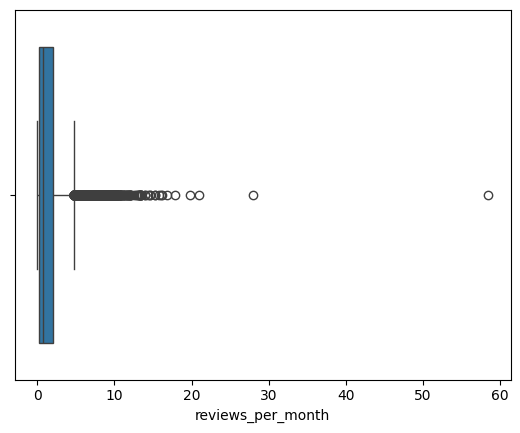

In [51]:
## Now for reviews per month first we will see how the data is and the number of outliers it has, based on that we will fill it with either mean, median or mode
sns.boxplot(data=df, x=df['reviews_per_month'])

In [52]:
## Since there are lot of outliers therefore we will use median to fillna
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [53]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [54]:
df['last_review'] = df['last_review'].fillna(df['last_review'].median())

In [55]:
## now we will come to categorical variable wherein we would first see the unique types of each category then accordingly encode it 
df['neighbourhood_group'].unique()
## SInce ther are 5 unique values hence we will use one hot encoding 
print(len(df['neighbourhood'].unique()))
df['room_type'].unique()

221


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [56]:
## Seeing neighbourhood_group to check how many unique groups are ther
OneHotEncoder = OneHotEncoder()
array = OneHotEncoder.fit_transform(df[['neighbourhood_group','neighbourhood','room_type']])

In [62]:
array_dense = array.toarray()


In [64]:
encoded_df = pd.DataFrame(array_dense, columns=OneHotEncoder.get_feature_names_out(['neighbourhood_group', 'neighbourhood', 'room_type']))

In [65]:
encoded_df.index =df.index
df=pd.concat([df, encoded_df], axis = 1)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
df.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'], inplace=True)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       ...
       'neighbourhood_Williamsburg', 'neighbourhood_Willowbrook',
       'neighbourhood_Windsor Terrace', 'neighbourhood_Woodhaven',
       'neighbourhood_Woodlawn', 'neighbourhood_Woodrow',
       'neighbourhood_Woodside', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object', length=242)

In [ ]:
## Now i think feature engineering is finished now time to do some EDA
# First checking for duplicates
df.duplicated().sum() # no duplicates
#  Now we will see correlation between all of them
# we done need name and host_name as we have the ID
df.drop(columns=['name', 'host_name'], inplace=True)

<Axes: >

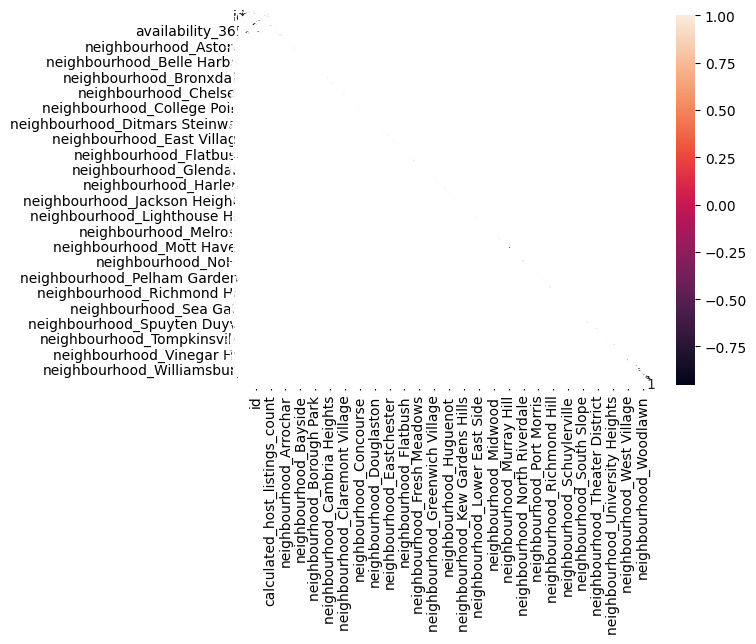

In [72]:
# Looking at the correlation matrix
sns.heatmap(df.corr(), annot=True)

(0.0, 1000.0)

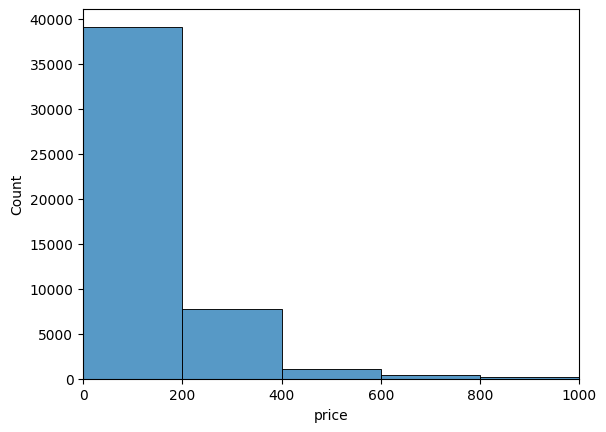

In [74]:
sns.histplot(df['price'], bins=50)
plt.xlim(0, 1000)  # limit extreme outliers


In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5)


ValueError: Could not interpret value `neighbourhood_group` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

<Axes: >

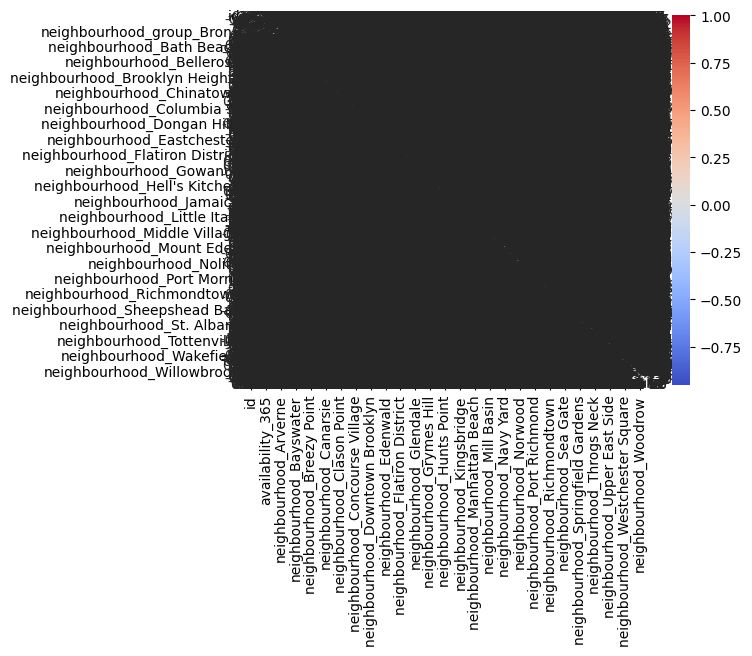

In [76]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
